Import Libraries

In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import warnings 
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

Read CSV files

In [2]:
features = pd.read_csv('/media/mowli/New Volume/Guvi/capston/FN/Regression_model/features.csv')
stores = pd.read_csv('/media/mowli/New Volume/Guvi/capston/FN/Regression_model/stores.csv')
train_df = pd.read_csv('/media/mowli/New Volume/Guvi/capston/FN/Regression_model/train.csv')

In [3]:
train_df

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


merge data

In [4]:
train_df = train_df.merge(features,on=['Store','Date','IsHoliday'],how = 'inner')
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [5]:
df = train_df.merge(stores,on=['Store'],how = 'inner')
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [6]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [7]:
df.fillna(0,inplace=True)

In [8]:
df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['week_of_year'] = df['Date'].dt.isocalendar().week

In [10]:
data = df.copy()

Combine Markdown

In [11]:
data['Markdown'] = data['MarkDown1']+data['MarkDown2']+data['MarkDown3']+data['MarkDown4']+data['MarkDown5']

In [12]:
data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,year,week_of_year,Markdown
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,A,151315,2010,5,0.00
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,A,151315,2010,6,0.00
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,A,151315,2010,7,0.00
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,A,151315,2010,8,0.00
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,A,151315,2010,9,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221,2012,39,9468.01
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,B,118221,2012,40,9659.00
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,B,118221,2012,41,6554.03
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,B,118221,2012,42,3982.42


In [13]:
data.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1,inplace=True)

In [14]:
data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,week_of_year,Markdown
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,2010,5,0.00
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315,2010,6,0.00
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315,2010,7,0.00
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315,2010,8,0.00
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315,2010,9,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,192.013558,8.684,B,118221,2012,39,9468.01
421566,45,98,2012-10-05,628.10,False,64.89,3.985,192.170412,8.667,B,118221,2012,40,9659.00
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,192.327265,8.667,B,118221,2012,41,6554.03
421568,45,98,2012-10-19,760.01,False,56.47,3.969,192.330854,8.667,B,118221,2012,42,3982.42


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   CPI           421570 non-null  float64       
 8   Unemployment  421570 non-null  float64       
 9   Type          421570 non-null  object        
 10  Size          421570 non-null  int64         
 11  year          421570 non-null  int32         
 12  week_of_year  421570 non-null  UInt32        
 13  Markdown      421570 non-null  float64       
dtypes: UInt32(1), bool(1), datetime64[ns](1), float64(6), int32(1), int6

In [16]:
df_copy = df.copy()

Label Encoder

In [17]:
le = LabelEncoder()
df_copy['IsHoliday'] = le.fit_transform(df_copy['IsHoliday'])
df_copy['Type'] = le.fit_transform(df_copy['Type'])
data['IsHoliday'] = le.fit_transform(data['IsHoliday'])
data['Type'] = le.fit_transform(data['Type'])


Correlation

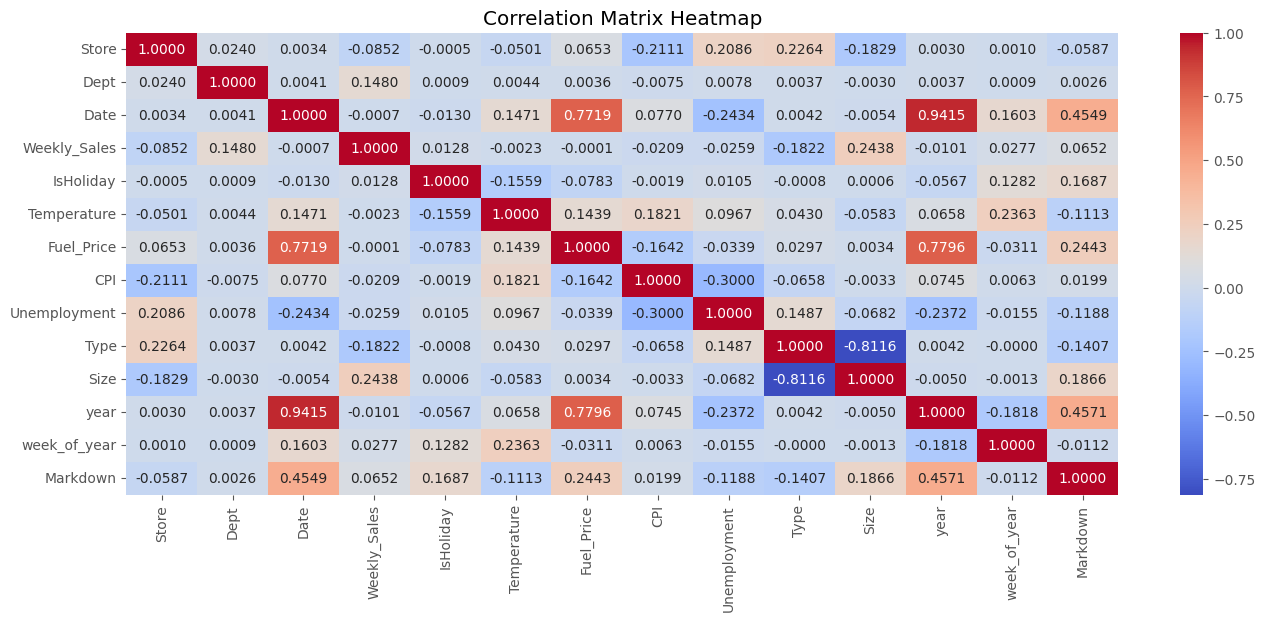

In [18]:
correlation_matrix = data.corr()
plt.figure(figsize=(16, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".4f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [19]:
df_copy.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
year            0
week_of_year    0
dtype: int64

Data Visualization

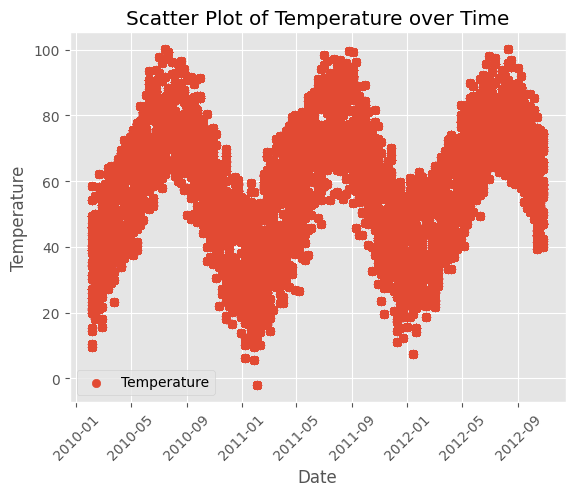

In [20]:
plt.scatter(df_copy['Date'], df_copy['Temperature'], label='Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Scatter Plot of Temperature over Time')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

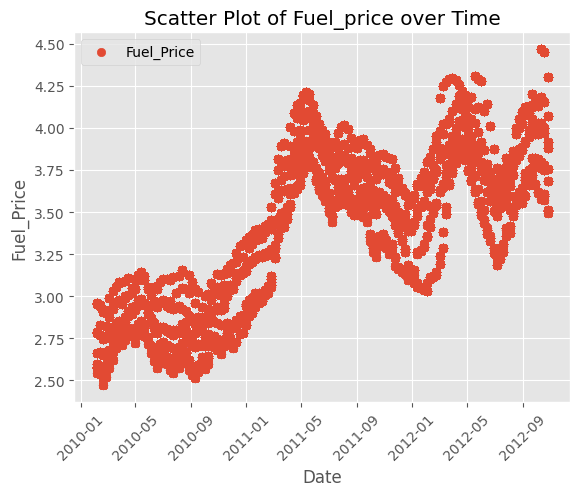

In [21]:
plt.scatter(df_copy['Date'], df_copy['Fuel_Price'], label='Fuel_Price')
plt.xlabel('Date')
plt.ylabel('Fuel_Price')
plt.title('Scatter Plot of Fuel_price over Time')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

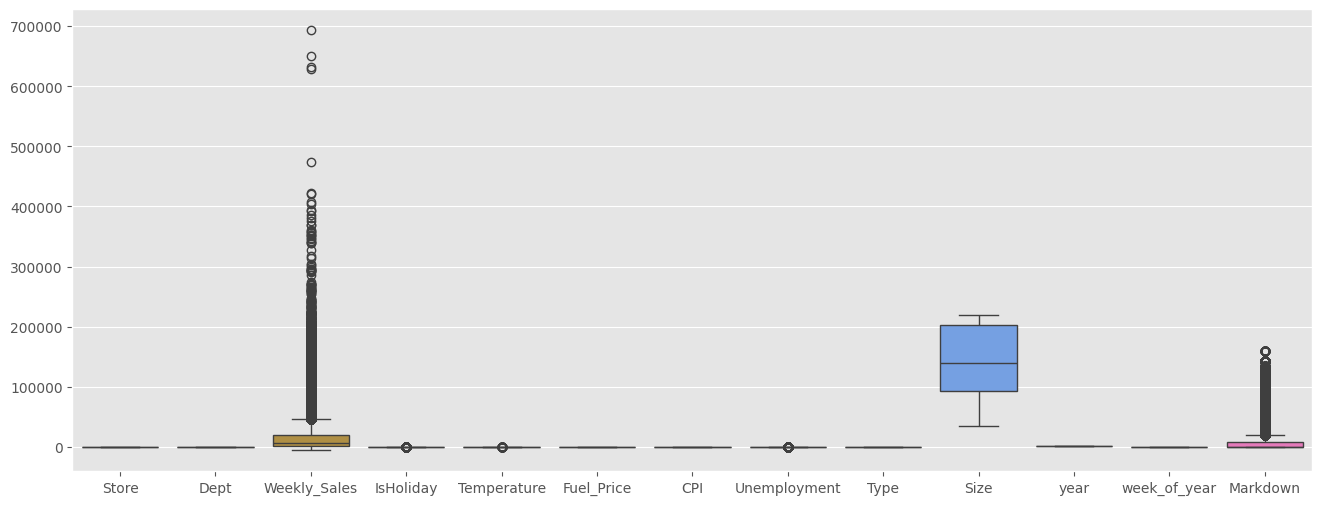

In [22]:
plt.figure(figsize=(16,6))
sns.boxplot(data=data)
plt.show()


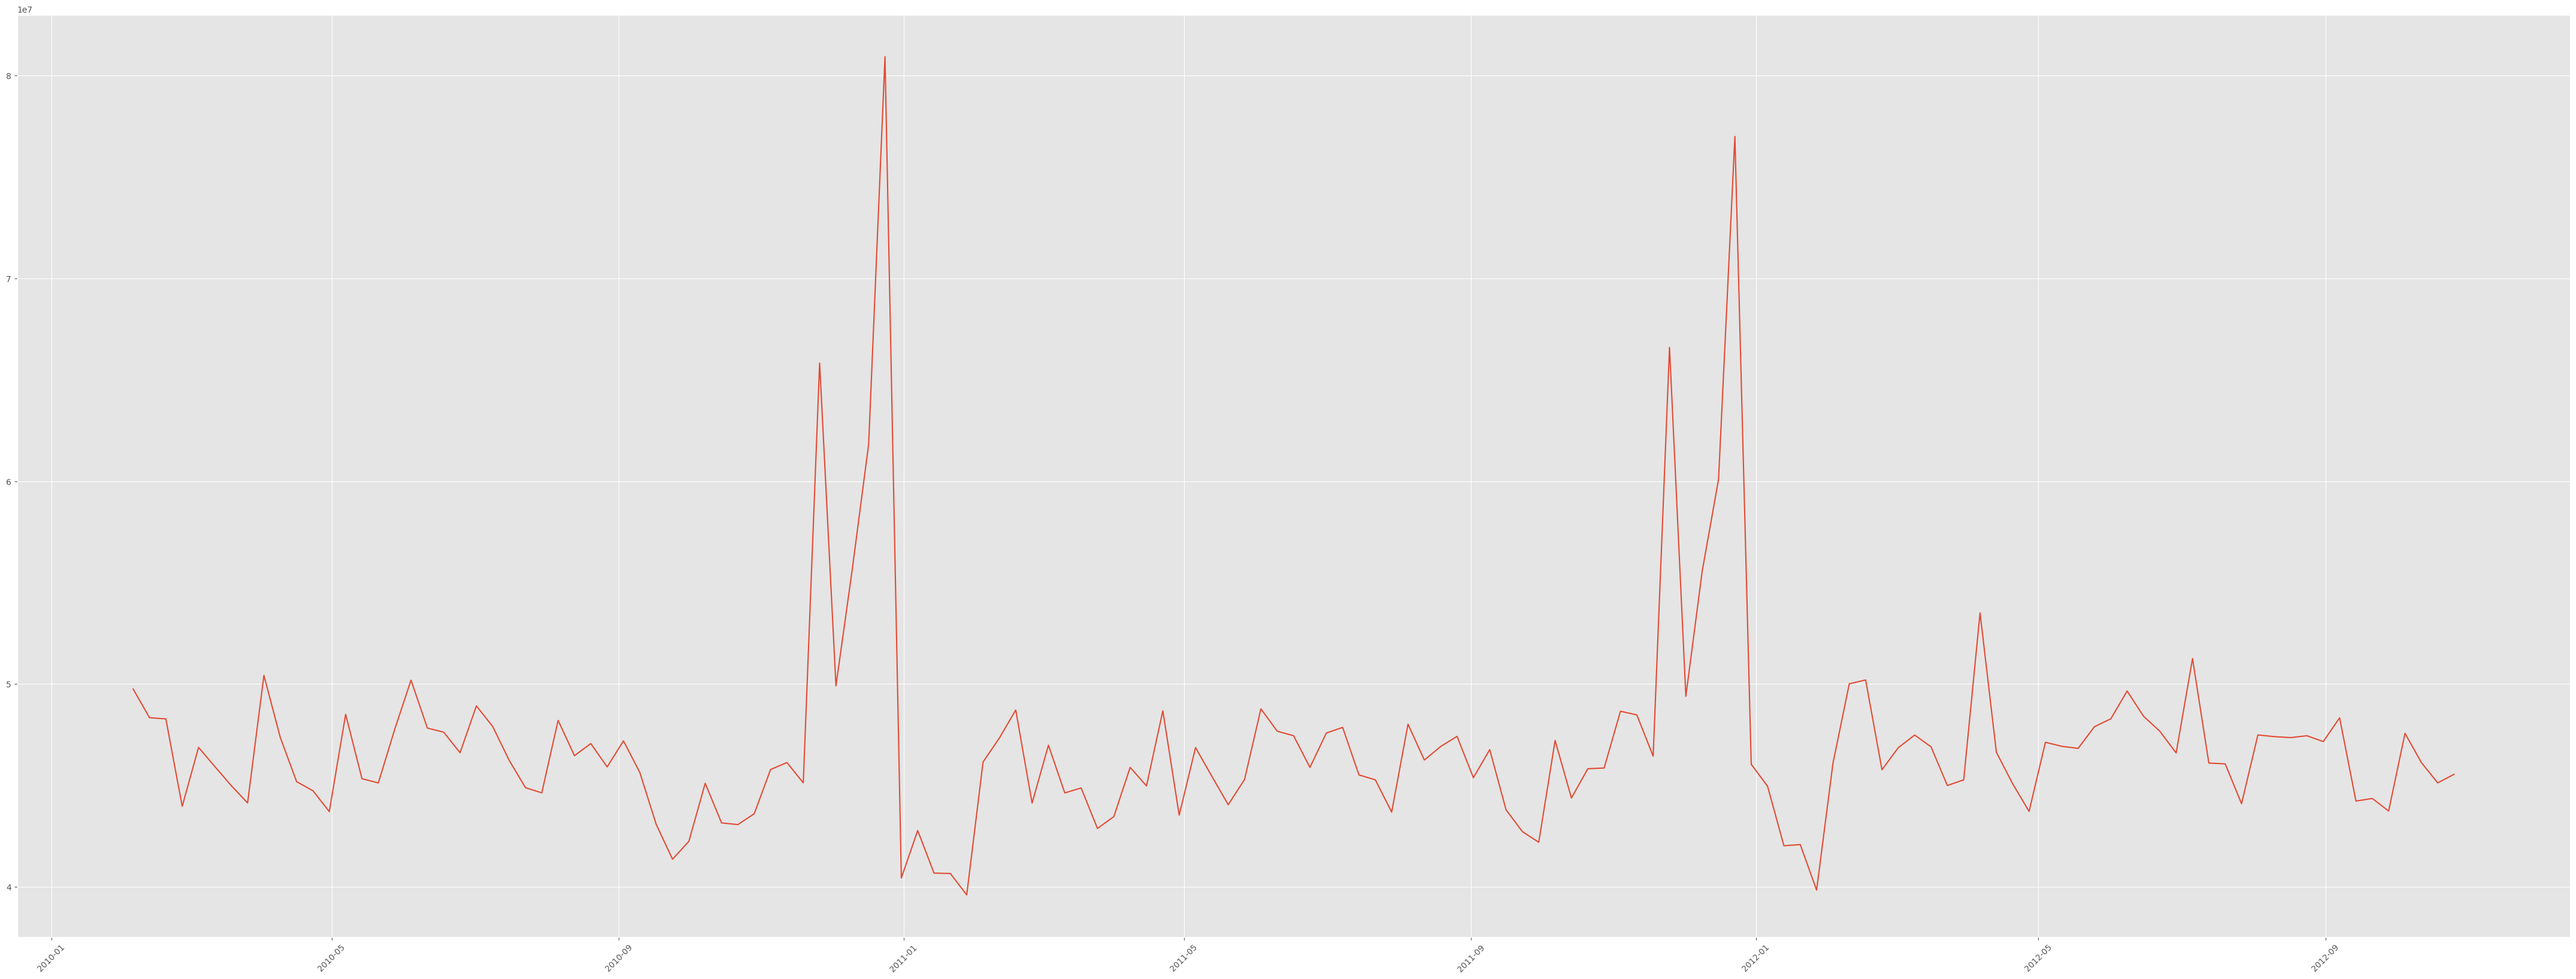

In [23]:
df_average_sales_week = data.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
df_average_sales = df_average_sales_week.sort_values('Weekly_Sales', ascending=False)

plt.figure(figsize=(55,20))
plt.plot(df_average_sales_week.Date, df_average_sales_week.Weekly_Sales)
plt.xticks(rotation=45)
plt.show()

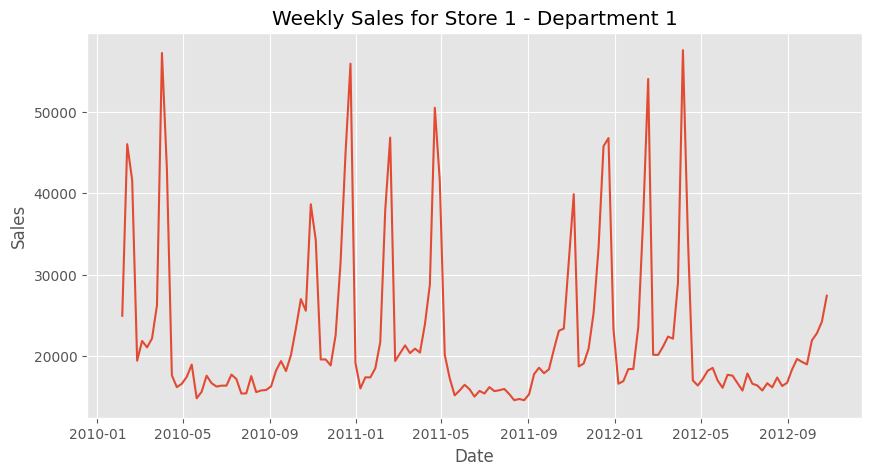

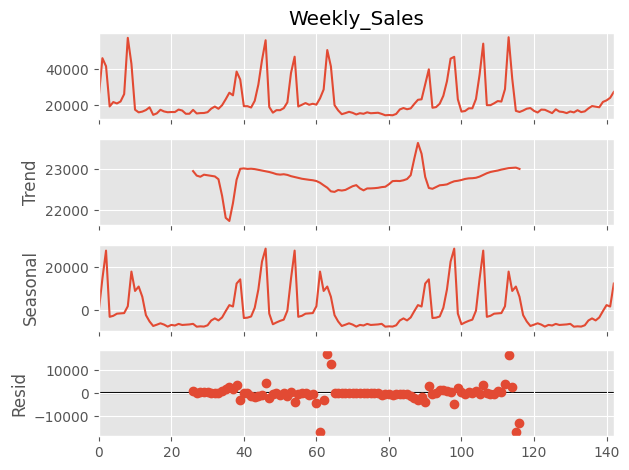

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

store_dept_sales = data[(data['Store'] == 1) & (data['Dept'] == 1)]
plt.figure(figsize=(10, 5))
plt.plot(store_dept_sales['Date'], store_dept_sales['Weekly_Sales'])
plt.title('Weekly Sales for Store 1 - Department 1')
plt.xlabel('Date')
plt.ylabel('Sales')

plt.show()

decomp = seasonal_decompose(store_dept_sales['Weekly_Sales'], model='additive', period=52)
decomp.plot()
plt.show()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.65427D+00    |proj g|=  3.79252D-01


 This problem is unconstrained.



At iterate    5    f=  6.51481D+00    |proj g|=  2.55680D-02

At iterate   10    f=  6.50673D+00    |proj g|=  6.55578D-04

At iterate   15    f=  6.50672D+00    |proj g|=  2.04072D-04

At iterate   20    f=  6.50667D+00    |proj g|=  3.79943D-03

At iterate   25    f=  6.50392D+00    |proj g|=  1.25337D-02

At iterate   30    f=  6.50328D+00    |proj g|=  5.98808D-04

At iterate   35    f=  6.50262D+00    |proj g|=  2.06100D-03

At iterate   40    f=  6.50253D+00    |proj g|=  1.84848D-04

At iterate   45    f=  6.50253D+00    |proj g|=  4.42053D-04

At iterate   50    f=  6.50231D+00    |proj g|=  6.95850D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/media/mowli/New Volume/Guvi/capston/FN/.venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


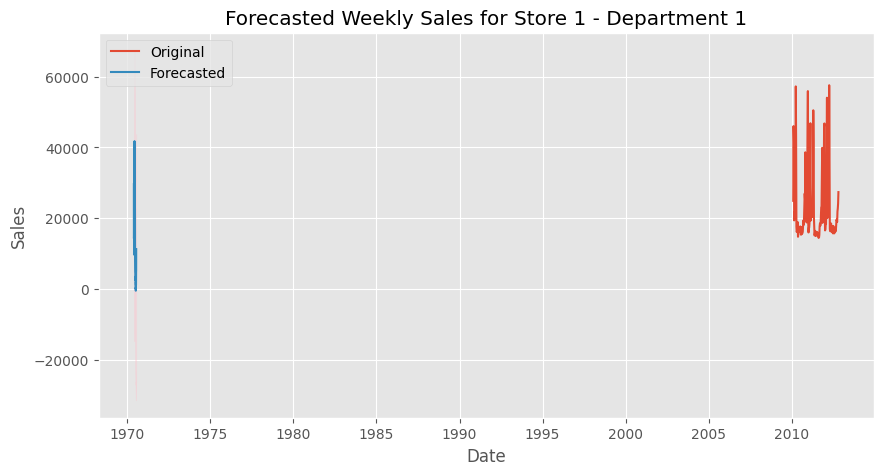

In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming you have the decomposed components as decomp.trend, decomp.seasonal, and decomp.resid
model = SARIMAX(store_dept_sales['Weekly_Sales'], 
                order=(1, 1, 1), 
                seasonal_order=(1, 1, 1, 52),
                trend='c').fit()

# Forecast future sales
forecast = model.get_forecast(steps=52)
predicted_sales = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Plotting the forecasted sales
plt.figure(figsize=(10, 5))
plt.plot(store_dept_sales['Date'], store_dept_sales['Weekly_Sales'], label='Original')
plt.plot(predicted_sales.index, predicted_sales, label='Forecasted')
plt.fill_between(predicted_sales.index, 
                 confidence_intervals.iloc[:, 0], 
                 confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Forecasted Weekly Sales for Store 1 - Department 1')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [34]:
def inv_trans(x):
  if x == 0:
    return x
  else:
    return 1/x

data['weekly_sales'] = data['Weekly_Sales'].apply(inv_trans)

In [35]:
x = data.drop(['Markdown','Weekly_Sales','Size','Type','Date'],axis = 1)
y = data['Markdown']

In [36]:

model = RandomForestRegressor(n_estimators=250,random_state=10,max_depth=15,min_samples_split=5)
model.fit(x,y)
y_pred = model.predict(data.drop(['Markdown','Weekly_Sales','Size','Type','Date'],axis = 1))

In [37]:
y_pred

array([   0.  ,    0.  ,    0.  , ..., 6554.03, 3982.42, 5247.26])

In [38]:
y_pred1 = model.predict(x)

In [39]:


mean_absolute_error(y, y_pred1)

469.4530757745037

In [40]:

neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(x, y)

KNeighborsRegressor(n_neighbors=3)

In [41]:
y_pred = neigh.predict(data.drop(['Markdown','Weekly_Sales','Size','Type','Date'],axis = 1))
y_pred

array([   0.        ,    0.        ,    0.        , ..., 5696.82666667,
       4839.62333333, 4825.64666667])

In [42]:
y_pred1 = neigh.predict(x)
print(mean_absolute_error(y, y_pred1))
y_pred1

445.6345725265081


array([   0.        ,    0.        ,    0.        , ..., 5696.82666667,
       4839.62333333, 4825.64666667])